In [11]:
# Importing all the necessary packages 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [12]:
df=pd.read_csv(r'C:\Users\abish\Downloads\520\Mini Project\Avila-DataSet for miniprojects.csv')
df.head()

,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [13]:
print('The shape of Avila Dataset:', df.shape)

The shape of Avila Dataset: (20867, 11)


In [14]:
print('Avila Dataset info:', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
Intercolumnar distance                20867 non-null float64
upper margin                          20867 non-null float64
 lower margin                         20867 non-null float64
exploitation                          20867 non-null float64
row number                            20867 non-null float64
modular ratio                         20867 non-null float64
interlinear spacing                   20867 non-null float64
weight                                20867 non-null float64
 peak number                          20867 non-null float64
modular ratio/ interlinear spacing    20867 non-null float64
Class                                 20867 non-null object
dtypes: float64(10), object(1)
memory usage: 1.8+ MB
Avila Dataset info: None


In [15]:
# To view the number of unique values, Missing Values and data types of the Avila Dataset
pd.DataFrame({'Unique_Values': df.nunique(),'Missing_Values':df.isna().sum(),'Data_Types':df.dtypes})


,Unique_Values,Missing_Values,Data_Types
Intercolumnar distance,144,0,float64
upper margin,208,0,float64
lower margin,232,0,float64
exploitation,751,0,float64
row number,48,0,float64
modular ratio,262,0,float64
interlinear spacing,281,0,float64
weight,19612,0,float64
peak number,288,0,float64
modular ratio/ interlinear spacing,19294,0,float64


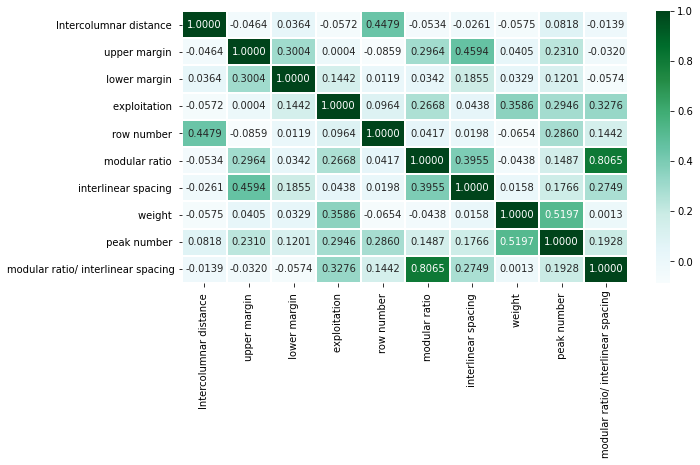

In [16]:
#Corelation Matrix
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), cmap = "BuGn", annot=True, linewidth=1, fmt='.4f', ax=ax)
plt.show()

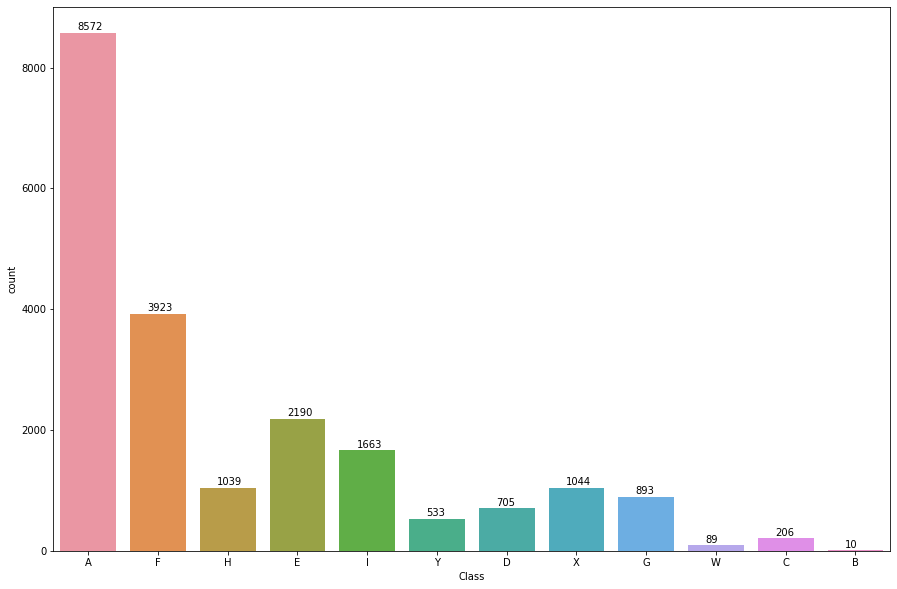

In [17]:
#Decision variable in the dataset is 'Class'
plt.figure(figsize=(15,10))
Class_plot=sns.countplot(df.Class)
#To show the count of the respective class on a barplot 
for q in Class_plot.patches:
    Class_plot.annotate(str(q.get_height()), (q.get_x()+0.25, q.get_height()+10), va='bottom', color='black')
plt.show()

In [18]:
#Encoding the decision variable using label encoder
le = LabelEncoder()
df['Class']=le.fit_transform(df['Class']) 
df.head()

,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5


In [19]:
#Assigning the X and y
X=df.loc[:, df.columns != 'Class']
y=df.Class


## Summary of Statistics

In [20]:
# Mean, Median and Standard Deviation is calculated
pd.DataFrame({'Mean': X.mean(),'Median': X.median(),'Standard Deviation': X.std()})


,Mean,Median,Standard Deviation
Intercolumnar distance,-3.306656e-09,0.056229,1.000007
upper margin,1.849807e-02,-0.055704,2.853117
lower margin,2.328867e-03,0.217845,1.058203
exploitation,1.154239e-04,0.089437,0.999997
row number,5.697992e-08,0.261718,0.999995
modular ratio,2.539710e-03,-0.058835,1.065179
interlinear spacing,3.977168e-03,0.220177,1.153325
weight,2.816658e-05,0.108279,1.000003
peak number,2.108022e-03,0.064084,1.045362
modular ratio/ interlinear spacing,6.938424e-05,-0.025918,1.000010


In [21]:
# Covariance of X
X_Covariance=X.cov()
X_Covariance


,Intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
Intercolumnar distance,1.000015,-0.132279,0.038563,-0.057191,0.447931,-0.056887,-0.030106,-0.057518,0.085496,-0.013904
upper margin,-0.132279,8.140275,0.906904,0.001211,-0.245059,0.900823,1.511633,0.115652,0.688978,-0.091261
lower margin,0.038563,0.906904,1.119794,0.152559,0.012562,0.038602,0.226396,0.034847,0.132831,-0.060730
exploitation,-0.057191,0.001211,0.152559,0.999995,0.096447,0.284166,0.050557,0.358603,0.308008,0.327629
row number,0.447931,-0.245059,0.012562,0.096447,0.999990,0.044415,0.022873,-0.065375,0.298996,0.144194
modular ratio,-0.056887,0.900823,0.038602,0.284166,0.044415,1.134606,0.485812,-0.046659,0.165523,0.859064
interlinear spacing,-0.030106,1.511633,0.226396,0.050557,0.022873,0.485812,1.330158,0.018249,0.212930,0.317088
weight,-0.057518,0.115652,0.034847,0.358603,-0.065375,-0.046659,0.018249,1.000006,0.543273,0.001312
peak number,0.085496,0.688978,0.132831,0.308008,0.298996,0.165523,0.212930,0.543273,1.092782,0.201554
modular ratio/ interlinear spacing,-0.013904,-0.091261,-0.060730,0.327629,0.144194,0.859064,0.317088,0.001312,0.201554,1.000020


In [22]:
#Scaling the X data
Scaler=StandardScaler()
rescaledX = Scaler.fit_transform(X)


In [23]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX)


[[ 2.661e-01 -6.453e-02  3.011e-01 ...  9.298e-01  2.383e-01  1.593e-01]
 [ 1.303e-01  2.987e-01 -3.036e+00 ...  6.362e-01  2.681e-01  5.155e-01]
 [-1.166e-01  1.802e-02  6.251e-02 ... -8.883e-01 -1.197e-01  5.829e-01]
 ...
 [-5.487e-02  1.969e-01  2.890e-02 ... -9.856e-01 -3.881e-01  1.276e+00]
 [ 8.092e-02  1.996e-01  1.210e-02 ...  1.638e-01 -8.986e-02 -5.934e-01]
 [ 3.772e-01 -1.241e-03  3.583e-01 ... -4.950e-01 -2.390e-01 -1.213e+00]]


## List of parameters that we chose for the model are:
Activation: ('tanh','relu','logistic')
max_iter:(200,500) default is 200
Solver: (‘lbfgs’, ‘sgd’, ‘adam’)
alpha: default is 0.0001
learning_rate: ‘constant’ is default
Hidden Layer Sizes(We used 1, 2 & 3 hidden layers of 10,20 & 30 combinations: [(10),(20),(30),(10,10),(10,20),(10,30),(20,10),(20,20),(20,30),(30,10),(30,20),(30,30),(10,10,10),(10,10,20),(10,10,30),(10,20,10),(10,20,20),(10,20,30),(10,30,10),(10,30,20),(10,30,30),(20,10,10),(20,10,20),(20,10,30),(20,20,10),(20,20,20),(20,20,30),(20,30,10),(20,30,20),(20,30,30),(30,10,10),(30,10,20),(30,10,30),(30,20,10),(30,20,20),(30,20,30),(30,30,10),(30,30,20),(30,30,30)]
The Best Model is chosen from the combinations of all hyperparameters 
K=5 fold Cross validation is performed for the MLP Classifier by choosing the hyperparameters above and using it Grid Search CV


In [24]:
kfold = model_selection.KFold(n_splits=5)
model_kfold = MLPClassifier()
parameters = {'activation':['tanh','relu'], 'max_iter':[(200),(500)],'hidden_layer_sizes':[(30,30,20),(30,30,30)],'solver':['sgd','adam']}
clf=GridSearchCV(model_kfold,parameters,cv=kfold,n_jobs=-1)

In [25]:
#Fitting the model
clf.fit(X,y)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(30, 30, 20), (30, 30, 30)],
                         'max_iter': [200, 500], 'solver': ['sgd', 'adam']})

In [26]:
#Creating a dataframe to print the result and sorting the mean test score in descending order
p=pd.DataFrame(clf.cv_results_).sort_values('mean_test_score',ascending=False)
p.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,102.863852,8.449986,0.014561,0.000798,tanh,"(30, 30, 30)",500,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.995208,0.996646,0.995926,0.995207,0.988258,0.994249,0.003043,1
3,95.543276,9.143564,0.012566,0.001954,tanh,"(30, 30, 20)",500,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.993771,0.994729,0.991373,0.996405,0.994009,0.994058,0.001628,2
5,49.644411,1.280908,0.017156,0.000746,tanh,"(30, 30, 30)",200,adam,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.969813,0.958793,0.961658,0.977714,0.979871,0.969570,0.008381,3
15,91.890426,17.006384,0.013365,0.004990,relu,"(30, 30, 30)",500,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.943220,0.969813,0.965013,0.975797,0.964294,0.963627,0.011002,4
11,100.867003,7.788482,0.016756,0.002309,relu,"(30, 30, 20)",500,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.925491,0.959032,0.966211,0.967649,0.927630,0.949203,0.018729,5


- From the above result we came to know that the parameters for the best model are: activation = 'tanh', Hidden_layer_sizes=(30,30,30), solver='adam' , max_iter =500 and its mean test score is 99.44%

In [27]:
# Model prediction on the Train and Test set (20% of the data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=45)

In [28]:
# Testing accuracies by choosing the best model that we got from the K fold Cross validation method
model = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='tanh', solver='adam', alpha=0.0001, random_state=500)
print(model)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
y_pred_train = model.predict(X_train)
current_test_acc = metrics.accuracy_score(y_test, y_hat)
print(current_test_acc)

MLPClassifier(activation='tanh', hidden_layer_sizes=(30, 30, 30),
              random_state=500)
0.9712505989458553


C:\Users\abish\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [29]:
# No. of parameters for the best model: (10*30+30)+(30*30+30)+(30*30+30)+(30*12+12)=330+930+930+372=2562 weights and biases (parameters to estimate the model)

print(metrics.classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1712
           1       1.00      1.00      1.00         1
           2       0.95      0.93      0.94        45
           3       0.96      0.96      0.96       138
           4       0.97      0.98      0.98       430
           5       0.95      0.97      0.96       795
           6       0.96      0.98      0.97       172
           7       0.96      0.92      0.94       211
           8       1.00      1.00      1.00       325
           9       1.00      1.00      1.00        17
          10       0.97      0.98      0.97       225
          11       0.98      0.96      0.97       103

    accuracy                           0.97      4174
   macro avg       0.97      0.97      0.97      4174
weighted avg       0.97      0.97      0.97      4174



In [30]:
# Accuracy (Train & Test) , Generalization Error for Train (1-Train Accuracy) and Test (1- Test Accuracy) is calculated:
print('Train Accuracy = {} '.format(accuracy_score(y_train, y_pred_train)))
print('Test Accuracy = {} '.format(accuracy_score(y_test, y_hat)))
print('Generalization Error on Train = {}'.format(1.0-accuracy_score(y_train, y_pred_train)))
print('Generalization Error on Test = {}'.format(1.0-accuracy_score(y_test, y_hat)))


Train Accuracy = 0.9855628107590008 
Test Accuracy = 0.9712505989458553 
Generalization Error on Train = 0.014437189240999238
Generalization Error on Test = 0.028749401054144696


In [31]:
# Confusion matrix for the trained model:
cm1 = confusion_matrix(y_train, y_pred_train)
print(cm1)

[[6742    0    0    0    5   90   13   10    0    0    0    0]
 [   0    9    0    0    0    0    0    0    0    0    0    0]
 [   0    0  159    1    0    1    0    0    0    0    0    0]
 [   1    0    0  565    1    0    0    0    0    0    0    0]
 [   8    0    0    1 1746    5    0    0    0    0    0    0]
 [  27    0    0    0    1 3093    3    4    0    0    0    0]
 [   8    0    0    0    0    5  708    0    0    0    0    0]
 [  31    0    5    0    0   11    1  780    0    0    0    0]
 [   1    0    0    0    0    0    0    0 1337    0    0    0]
 [   0    0    0    0    0    0    0    0    0   72    0    0]
 [   6    0    0    0    1    0    0    0    0    0  812    0]
 [   0    0    0    0    0    0    0    0    0    0    1  429]]


Text(0.5, 1.0, 'Train Confusion Matrix')

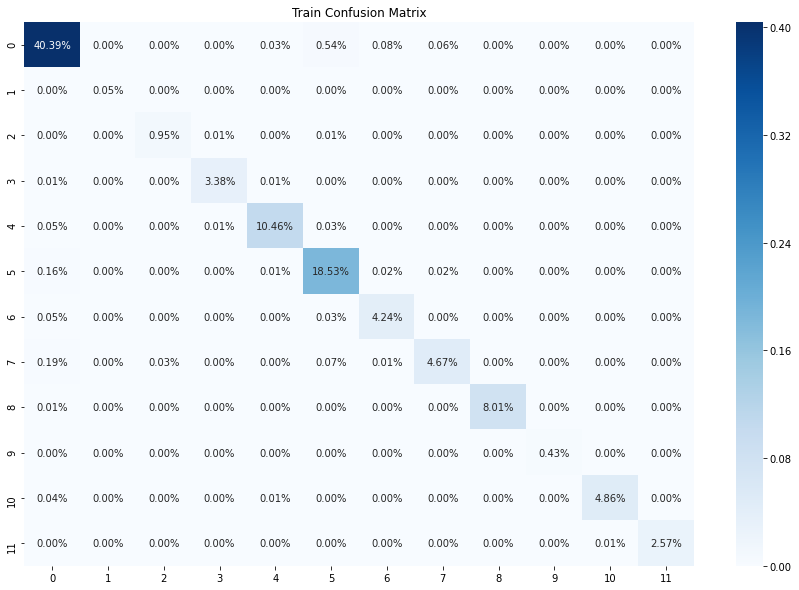

In [33]:
# Plotted the Confusion matrix for the trained model (in %):
plt.figure(figsize=(15,10))
CMT1=sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='.2%', cmap='Blues')
CMT1.set_title('Train Confusion Matrix')


In [34]:
# Confusion matrix for the tested model:
cm = confusion_matrix(y_test, y_hat)
print(cm)


[[1664    0    0    0    1   35    4    6    0    0    2    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   3    0   42    0    0    0    0    0    0    0    0    0]
 [   2    0    0  132    4    0    0    0    0    0    0    0]
 [   1    0    0    3  422    3    0    0    0    0    1    0]
 [  16    0    0    1    4  769    3    2    0    0    0    0]
 [   2    0    0    0    0    1  169    0    0    0    0    0]
 [   9    0    2    0    1    4    0  195    0    0    0    0]
 [   1    0    0    0    0    0    0    0  324    0    0    0]
 [   0    0    0    0    0    0    0    0    0   17    0    0]
 [   1    0    0    1    1    0    0    0    0    0  220    2]
 [   0    0    0    0    0    0    0    0    0    0    4   99]]


Text(0.5, 1.0, 'Test Confusion Matrix')

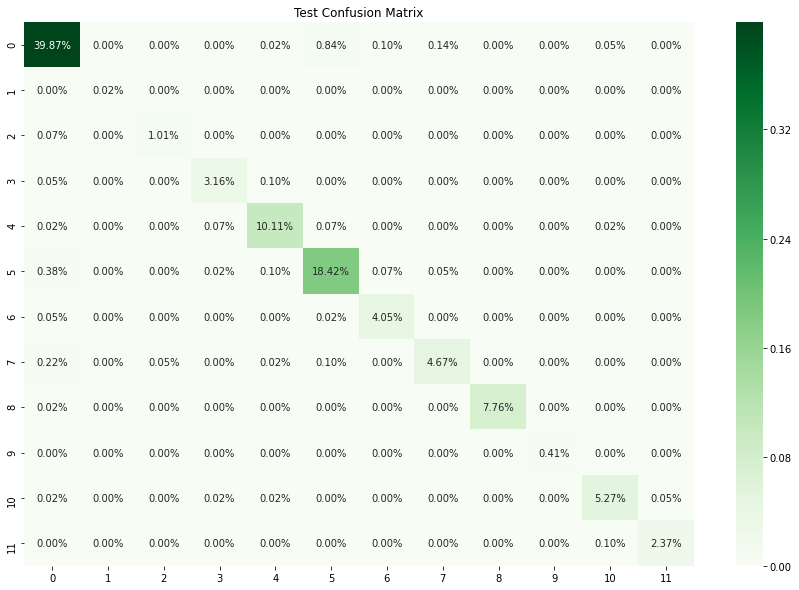

In [35]:
# Plotted the Confusion matrix for the tested model (in %):
plt.figure(figsize=(15,10))
CMT=sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Greens')
CMT.set_title('Test Confusion Matrix')


Finally, The model is not overfitted.